## Installing the required libraries using pip

In [1]:
# !pip install mne
# !pip install scipy
# !pip install pymatreader
# !pip install EDFlib-Python
# !pip install mne-bids[full]

In [2]:
from pathlib import Path
import mne_bids
import matplotlib.pyplot as plt

In [3]:
bids_root = Path('ds004504-download')

In [4]:
mne_bids.print_dir_tree(bids_root, max_depth=4)

|ds004504-download\
|--- .gitattributes
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- .datalad\
|------ config
|--- derivatives\
|------ sub-001\
|--------- eeg\
|------------ sub-001_task-eyesclosed_eeg.set
|------ sub-002\
|--------- eeg\
|------------ sub-002_task-eyesclosed_eeg.set
|------ sub-003\
|--------- eeg\
|------------ sub-003_task-eyesclosed_eeg.set
|------ sub-004\
|--------- eeg\
|------------ sub-004_task-eyesclosed_eeg.set
|------ sub-005\
|--------- eeg\
|------------ sub-005_task-eyesclosed_eeg.set
|------ sub-006\
|--------- eeg\
|------------ sub-006_task-eyesclosed_eeg.set
|------ sub-007\
|--------- eeg\
|------------ sub-007_task-eyesclosed_eeg.set
|------ sub-008\
|--------- eeg\
|------------ sub-008_task-eyesclosed_eeg.set
|------ sub-009\
|--------- eeg\
|------------ sub-009_task-eyesclosed_eeg.set
|------ sub-010\
|--------- eeg\
|------------ sub-010_task-eyesclosed_eeg.set
|------ sub-011\
|----

In [5]:
print(mne_bids.make_report(bids_root))

Summarizing participants.tsv ds004504-download\participants.tsv...
The participant template found: sex were all unknown;
handedness were all unknown;
ages all unknown
 The A dataset of EEG recordings from: Alzheimer's disease, Frontotemporal
dementia and Healthy subjects dataset was created by Andreas Miltiadous,
Katerina D. Tzimourta, Theodora Afrantou, Panagiotis Ioannidis, Nikolaos
Grigoriadis, Dimitrios G. Tsalikakis, Pantelis Angelidis, Markos G. Tsipouras,
Evripidis Glavas, Nikolaos Giannakeas, and Alexandros T. Tzallas and conforms to
BIDS version v1.2.1. This report was generated with MNE-BIDS
(https://doi.org/10.21105/joss.01896). The dataset consists of 88 participants
(sex were all unknown; handedness were all unknown; ages all unknown) .


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\4200437805.py:1: RuntimeWarning: No *scans.tsv files found. Currently, we do not generate a report without the scans.tsv files.
  print(mne_bids.make_report(bids_root))


In [6]:
bids_path = mne_bids.BIDSPath(
    subject='040',
    task = 'eyesclosed',
    suffix='eeg',
    extension='.set',
    datatype='eeg',
    root=bids_root
)

In [7]:
raw = mne_bids.read_raw_bids(bids_path)


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\1759512196.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-040\eeg\sub-040_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\1759512196.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-040_task-eyesclosed.

The search_str was "ds004504-download\sub-040\**\eeg\sub-040*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


In [8]:
raw.info["subject_info"]

{'his_id': 'sub-040', 'Gender': 'M', 'Age': '61', 'Group': 'C', 'MMSE': '30'}

In [ ]:
adj_mat = [[0, 0, 0, 0,0],
           [0, 0, 0, 1, 1],
           [1, 1, 1, 0, 1], 
           [1,1, 1, 1, 1],
           [0, 1, 0, 0, 0]]
x = [0,0, 1,0, 1, 1,0, 0, 0, 1]


In [9]:
raw.info['line_freq'] # power line frequency

50.0

In [10]:
subjects = mne_bids.get_entity_vals(bids_root, entity_key='subject')
healthy = 0
frontemporal = 0
alzheimers = 0
min_len = 300000
max_len = 0
for subject in subjects:
    bids_path = mne_bids.BIDSPath(
        subject=subject,
        task = 'eyesclosed',
        suffix='eeg',
        extension='.set',
        datatype='eeg',
        root=bids_root
        )
    raw = mne_bids.read_raw_bids(bids_path)
    min_len = min(min_len, len(raw.get_data()[0]))
    max_len = max(max_len, len(raw.get_data()[0]))
    if raw.info['subject_info']['Group'] == 'A':
        alzheimers += 1
    elif raw.info['subject_info']['Group'] == 'C':
        healthy += 1
    else:
        frontemporal += 1



Reading channel info from ds004504-download\sub-001\eeg\sub-001_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "ds004504-download\sub-001\**\eeg\sub-001*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-002\eeg\sub-002_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-002_task-eyesclosed.

The search_str was "ds004504-download\sub-002\**\eeg\sub-002*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-003\eeg\sub-003_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-003_task-eyesclosed.

The search_str was "ds004504-download\sub-003\**\eeg\sub-003*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-004\eeg\sub-004_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-004_task-eyesclosed.

The search_str was "ds004504-download\sub-004\**\eeg\sub-004*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-005\eeg\sub-005_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-005_task-eyesclosed.

The search_str was "ds004504-download\sub-005\**\eeg\sub-005*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-006\eeg\sub-006_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-006_task-eyesclosed.

The search_str was "ds004504-download\sub-006\**\eeg\sub-006*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-007\eeg\sub-007_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-007_task-eyesclosed.

The search_str was "ds004504-download\sub-007\**\eeg\sub-007*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-008\eeg\sub-008_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-008_task-eyesclosed.

The search_str was "ds004504-download\sub-008\**\eeg\sub-008*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-009\eeg\sub-009_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-009_task-eyesclosed.

The search_str was "ds004504-download\sub-009\**\eeg\sub-009*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-010\eeg\sub-010_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-010_task-eyesclosed.

The search_str was "ds004504-download\sub-010\**\eeg\sub-010*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-011\eeg\sub-011_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-011_task-eyesclosed.

The search_str was "ds004504-download\sub-011\**\eeg\sub-011*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-012\eeg\sub-012_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-012_task-eyesclosed.

The search_str was "ds004504-download\sub-012\**\eeg\sub-012*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-013\eeg\sub-013_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-013_task-eyesclosed.

The search_str was "ds004504-download\sub-013\**\eeg\sub-013*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-014\eeg\sub-014_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-014_task-eyesclosed.

The search_str was "ds004504-download\sub-014\**\eeg\sub-014*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-015\eeg\sub-015_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-015_task-eyesclosed.

The search_str was "ds004504-download\sub-015\**\eeg\sub-015*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-016\eeg\sub-016_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-016_task-eyesclosed.

The search_str was "ds004504-download\sub-016\**\eeg\sub-016*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-017\eeg\sub-017_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-017_task-eyesclosed.

The search_str was "ds004504-download\sub-017\**\eeg\sub-017*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-018\eeg\sub-018_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-018_task-eyesclosed.

The search_str was "ds004504-download\sub-018\**\eeg\sub-018*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-019\eeg\sub-019_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-019_task-eyesclosed.

The search_str was "ds004504-download\sub-019\**\eeg\sub-019*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-020\eeg\sub-020_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-020_task-eyesclosed.

The search_str was "ds004504-download\sub-020\**\eeg\sub-020*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-021\eeg\sub-021_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-021_task-eyesclosed.

The search_str was "ds004504-download\sub-021\**\eeg\sub-021*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-022\eeg\sub-022_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-022_task-eyesclosed.

The search_str was "ds004504-download\sub-022\**\eeg\sub-022*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-023\eeg\sub-023_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-023_task-eyesclosed.

The search_str was "ds004504-download\sub-023\**\eeg\sub-023*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-024\eeg\sub-024_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-024_task-eyesclosed.

The search_str was "ds004504-download\sub-024\**\eeg\sub-024*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-025\eeg\sub-025_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-025_task-eyesclosed.

The search_str was "ds004504-download\sub-025\**\eeg\sub-025*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-026\eeg\sub-026_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-026_task-eyesclosed.

The search_str was "ds004504-download\sub-026\**\eeg\sub-026*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-027\eeg\sub-027_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-027_task-eyesclosed.

The search_str was "ds004504-download\sub-027\**\eeg\sub-027*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-028\eeg\sub-028_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-028_task-eyesclosed.

The search_str was "ds004504-download\sub-028\**\eeg\sub-028*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-029\eeg\sub-029_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-029_task-eyesclosed.

The search_str was "ds004504-download\sub-029\**\eeg\sub-029*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-030\eeg\sub-030_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-030_task-eyesclosed.

The search_str was "ds004504-download\sub-030\**\eeg\sub-030*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-031\eeg\sub-031_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-031_task-eyesclosed.

The search_str was "ds004504-download\sub-031\**\eeg\sub-031*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-032\eeg\sub-032_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-032_task-eyesclosed.

The search_str was "ds004504-download\sub-032\**\eeg\sub-032*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-033\eeg\sub-033_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-033_task-eyesclosed.

The search_str was "ds004504-download\sub-033\**\eeg\sub-033*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-034\eeg\sub-034_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-034_task-eyesclosed.

The search_str was "ds004504-download\sub-034\**\eeg\sub-034*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-035\eeg\sub-035_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-035_task-eyesclosed.

The search_str was "ds004504-download\sub-035\**\eeg\sub-035*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-036\eeg\sub-036_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-036_task-eyesclosed.

The search_str was "ds004504-download\sub-036\**\eeg\sub-036*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-037\eeg\sub-037_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-037_task-eyesclosed.

The search_str was "ds004504-download\sub-037\**\eeg\sub-037*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-038\eeg\sub-038_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-038_task-eyesclosed.

The search_str was "ds004504-download\sub-038\**\eeg\sub-038*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-039\eeg\sub-039_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-039_task-eyesclosed.

The search_str was "ds004504-download\sub-039\**\eeg\sub-039*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-040\eeg\sub-040_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-040_task-eyesclosed.

The search_str was "ds004504-download\sub-040\**\eeg\sub-040*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-041\eeg\sub-041_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-041_task-eyesclosed.

The search_str was "ds004504-download\sub-041\**\eeg\sub-041*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-042\eeg\sub-042_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-042_task-eyesclosed.

The search_str was "ds004504-download\sub-042\**\eeg\sub-042*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-043\eeg\sub-043_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-043_task-eyesclosed.

The search_str was "ds004504-download\sub-043\**\eeg\sub-043*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-044\eeg\sub-044_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-044_task-eyesclosed.

The search_str was "ds004504-download\sub-044\**\eeg\sub-044*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-045\eeg\sub-045_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-045_task-eyesclosed.

The search_str was "ds004504-download\sub-045\**\eeg\sub-045*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-046\eeg\sub-046_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-046_task-eyesclosed.

The search_str was "ds004504-download\sub-046\**\eeg\sub-046*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-047\eeg\sub-047_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-047_task-eyesclosed.

The search_str was "ds004504-download\sub-047\**\eeg\sub-047*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-048\eeg\sub-048_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-048_task-eyesclosed.

The search_str was "ds004504-download\sub-048\**\eeg\sub-048*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-049\eeg\sub-049_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-049_task-eyesclosed.

The search_str was "ds004504-download\sub-049\**\eeg\sub-049*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-050\eeg\sub-050_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-050_task-eyesclosed.

The search_str was "ds004504-download\sub-050\**\eeg\sub-050*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-051\eeg\sub-051_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-051_task-eyesclosed.

The search_str was "ds004504-download\sub-051\**\eeg\sub-051*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-052\eeg\sub-052_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-052_task-eyesclosed.

The search_str was "ds004504-download\sub-052\**\eeg\sub-052*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-053\eeg\sub-053_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-053_task-eyesclosed.

The search_str was "ds004504-download\sub-053\**\eeg\sub-053*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-054\eeg\sub-054_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-054_task-eyesclosed.

The search_str was "ds004504-download\sub-054\**\eeg\sub-054*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-055\eeg\sub-055_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-055_task-eyesclosed.

The search_str was "ds004504-download\sub-055\**\eeg\sub-055*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-056\eeg\sub-056_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-056_task-eyesclosed.

The search_str was "ds004504-download\sub-056\**\eeg\sub-056*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-057\eeg\sub-057_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-057_task-eyesclosed.

The search_str was "ds004504-download\sub-057\**\eeg\sub-057*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-058\eeg\sub-058_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-058_task-eyesclosed.

The search_str was "ds004504-download\sub-058\**\eeg\sub-058*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-059\eeg\sub-059_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-059_task-eyesclosed.

The search_str was "ds004504-download\sub-059\**\eeg\sub-059*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-060\eeg\sub-060_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-060_task-eyesclosed.

The search_str was "ds004504-download\sub-060\**\eeg\sub-060*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-061\eeg\sub-061_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-061_task-eyesclosed.

The search_str was "ds004504-download\sub-061\**\eeg\sub-061*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-062\eeg\sub-062_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-062_task-eyesclosed.

The search_str was "ds004504-download\sub-062\**\eeg\sub-062*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-063\eeg\sub-063_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-063_task-eyesclosed.

The search_str was "ds004504-download\sub-063\**\eeg\sub-063*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-064\eeg\sub-064_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-064_task-eyesclosed.

The search_str was "ds004504-download\sub-064\**\eeg\sub-064*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-065\eeg\sub-065_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-065_task-eyesclosed.

The search_str was "ds004504-download\sub-065\**\eeg\sub-065*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-066\eeg\sub-066_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-066_task-eyesclosed.

The search_str was "ds004504-download\sub-066\**\eeg\sub-066*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-067_task-eyesclosed.

The search_str was "ds004504-download\sub-067\**\eeg\sub-067*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-067\eeg\sub-067_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-068\eeg\sub-068_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-068_task-eyesclosed.

The search_str was "ds004504-download\sub-068\**\eeg\sub-068*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-069_task-eyesclosed.

The search_str was "ds004504-download\sub-069\**\eeg\sub-069*events.tsv"
  raw = mne_bids.rea

Reading channel info from ds004504-download\sub-069\eeg\sub-069_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-070\eeg\sub-070_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-070_task-eyesclosed.

The search_str was "ds004504-download\sub-070\**\eeg\sub-070*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-071\eeg\sub-071_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-071_task-eyesclosed.

The search_str was "ds004504-download\sub-071\**\eeg\sub-071*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-072\eeg\sub-072_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-072_task-eyesclosed.

The search_str was "ds004504-download\sub-072\**\eeg\sub-072*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-073\eeg\sub-073_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-073_task-eyesclosed.

The search_str was "ds004504-download\sub-073\**\eeg\sub-073*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-074\eeg\sub-074_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-074_task-eyesclosed.

The search_str was "ds004504-download\sub-074\**\eeg\sub-074*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-075\eeg\sub-075_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-075_task-eyesclosed.

The search_str was "ds004504-download\sub-075\**\eeg\sub-075*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-076\eeg\sub-076_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-076_task-eyesclosed.

The search_str was "ds004504-download\sub-076\**\eeg\sub-076*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-077\eeg\sub-077_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-077_task-eyesclosed.

The search_str was "ds004504-download\sub-077\**\eeg\sub-077*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-078\eeg\sub-078_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-078_task-eyesclosed.

The search_str was "ds004504-download\sub-078\**\eeg\sub-078*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-079\eeg\sub-079_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-079_task-eyesclosed.

The search_str was "ds004504-download\sub-079\**\eeg\sub-079*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-080\eeg\sub-080_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-080_task-eyesclosed.

The search_str was "ds004504-download\sub-080\**\eeg\sub-080*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-081\eeg\sub-081_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-081_task-eyesclosed.

The search_str was "ds004504-download\sub-081\**\eeg\sub-081*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-082\eeg\sub-082_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-082_task-eyesclosed.

The search_str was "ds004504-download\sub-082\**\eeg\sub-082*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-083\eeg\sub-083_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-083_task-eyesclosed.

The search_str was "ds004504-download\sub-083\**\eeg\sub-083*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-084\eeg\sub-084_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-084_task-eyesclosed.

The search_str was "ds004504-download\sub-084\**\eeg\sub-084*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-085\eeg\sub-085_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-085_task-eyesclosed.

The search_str was "ds004504-download\sub-085\**\eeg\sub-085*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-086\eeg\sub-086_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-086_task-eyesclosed.

The search_str was "ds004504-download\sub-086\**\eeg\sub-086*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-087\eeg\sub-087_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-087_task-eyesclosed.

The search_str was "ds004504-download\sub-087\**\eeg\sub-087*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path)


Reading channel info from ds004504-download\sub-088\eeg\sub-088_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_37052\3117705784.py:16: RuntimeWarning: Did not find any events.tsv associated with sub-088_task-eyesclosed.

The search_str was "ds004504-download\sub-088\**\eeg\sub-088*events.tsv"
  raw = mne_bids.read_raw_bids(bids_path)


alzheimers=36, healthy=29, frontemporal=23


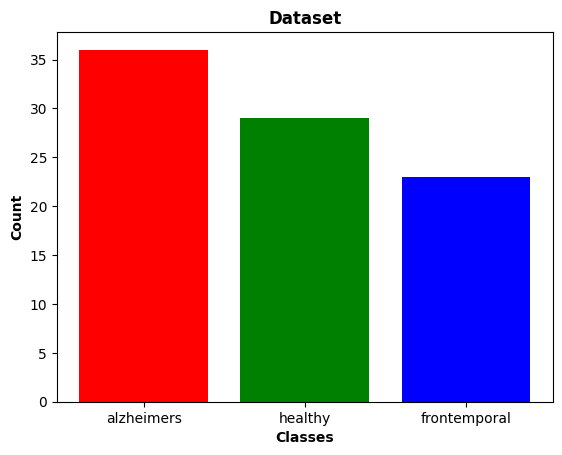

In [38]:
plt.bar(['alzheimers', 'healthy', 'frontemporal'], [alzheimers, healthy, frontemporal], color=['red', 'green', 'blue'])
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Dataset', fontweight='bold')
print(f'{alzheimers=}, {healthy=}, {frontemporal=}')

In [11]:
min_len, max_len

(153550, 645550)

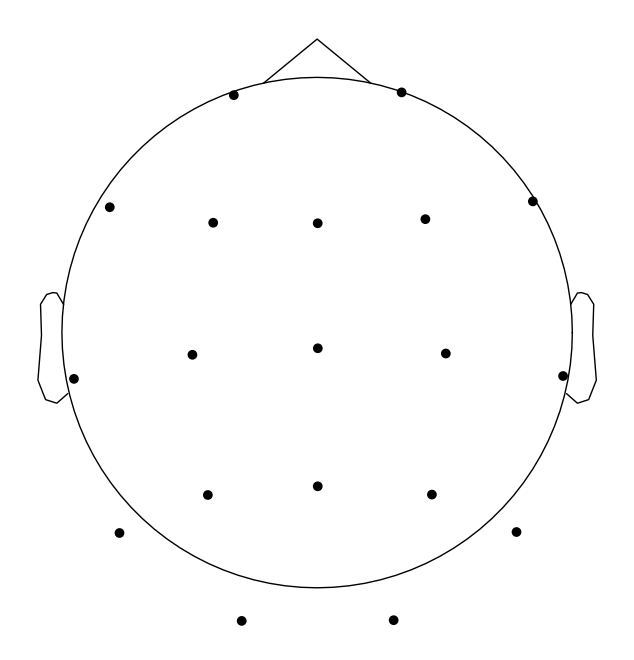

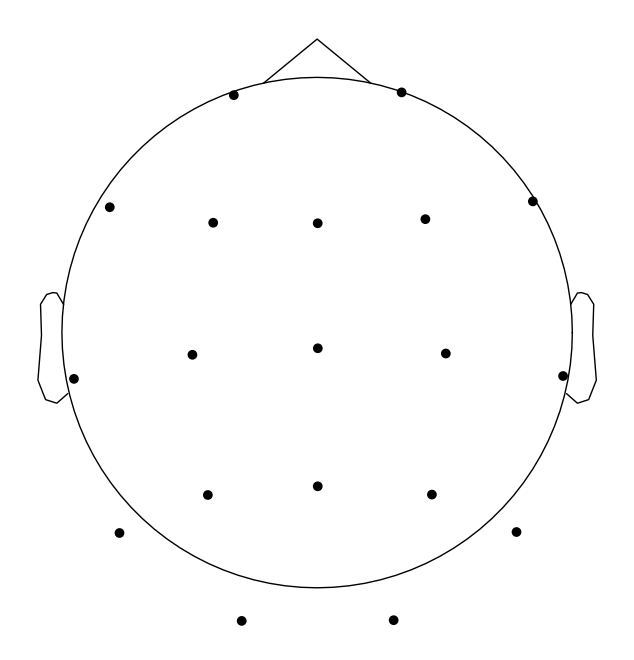

In [72]:
raw.plot_sensors()

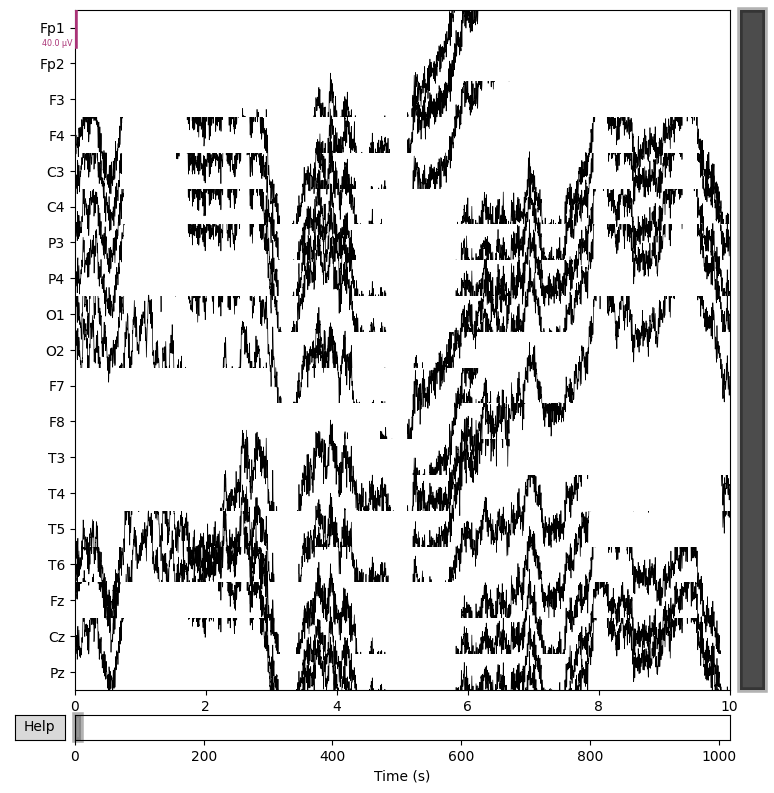

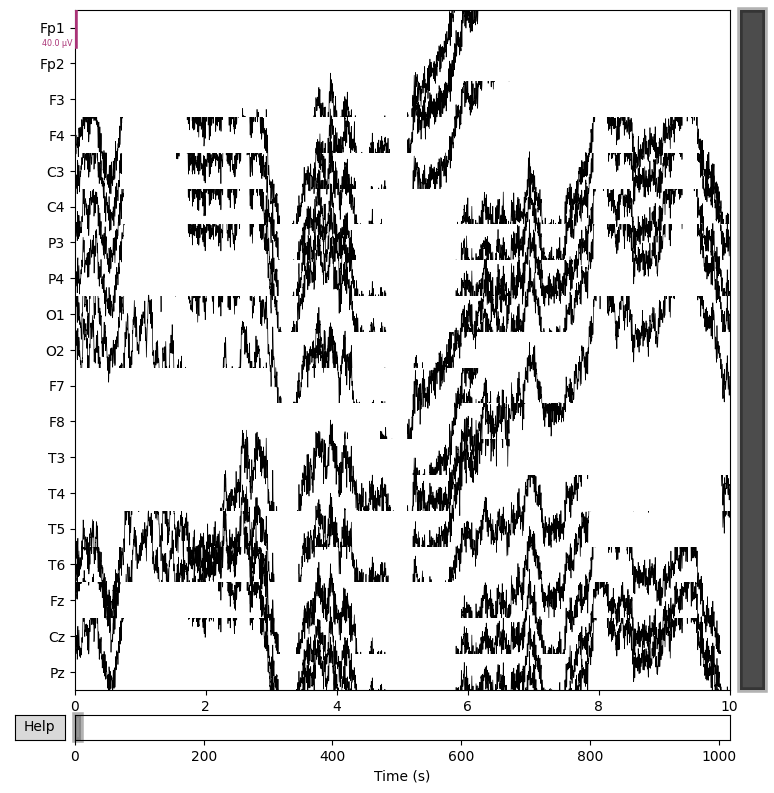

In [73]:
raw.plot()

In [74]:
raw.info["sfreq"]

500.0

In [16]:
len(raw.get_data()[0])

508550

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
Effective window size : 4.096 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


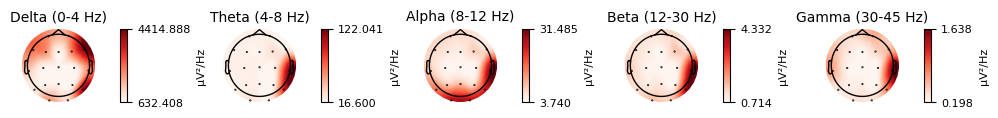

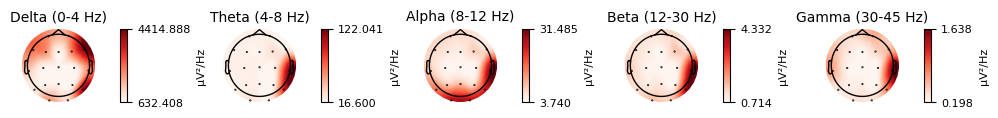

In [76]:
raw.plot_psd_topomap()

In [18]:
data = raw.get_data()

Effective window size : 4.096 (s)


c:\Users\mashh\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


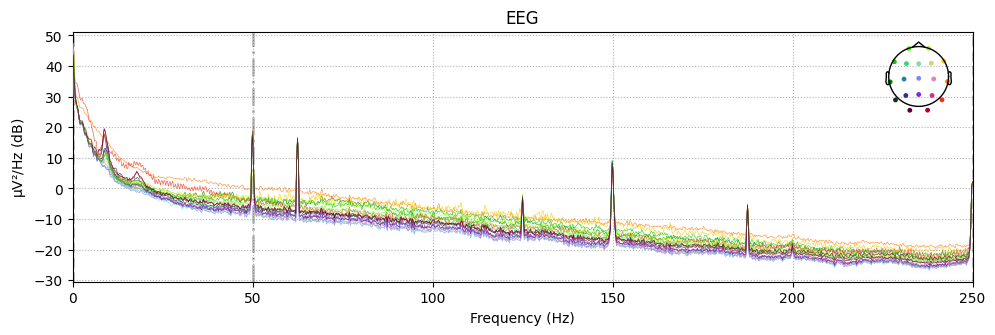

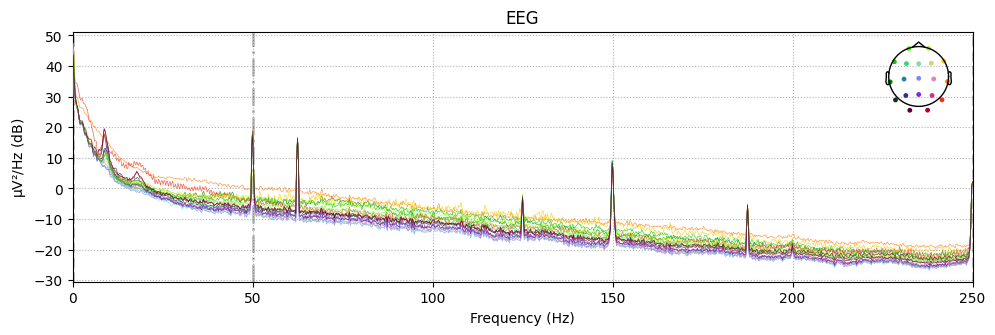

In [50]:
raw.compute_psd().plot()

Effective window size : 4.096 (s)


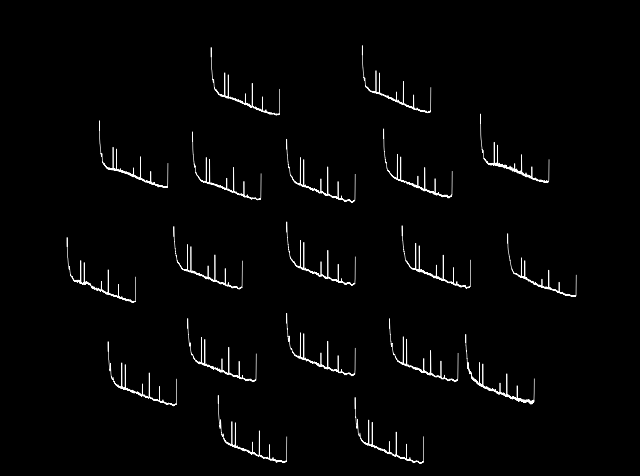

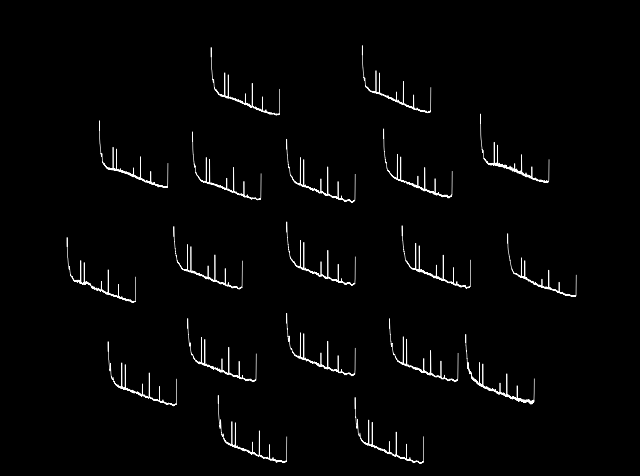

In [54]:
raw.compute_psd().plot_topo()

In [19]:
data.shape

(19, 508550)

In [20]:
len(data)

19

In [22]:
len(raw.ch_names)

19

# Extracting features

In [33]:
from scipy.signal import csd, hilbert, welch
from scipy import stats
from scipy.integrate import simps
import numpy as np
from abc import ABC, abstractmethod
from sklearn import preprocessing
import torch
from itertools import product
from torch_geometric.data import Data


In [34]:
MAX_SAMPLES = 284672
NUM_CHANNELS = 19
SF = 256

# Create a graph

In [44]:
raw.info['subject_info']['Group']


'C'

In [41]:
data


array([[-1.04326160e-03, -1.04697253e-03, -1.05664050e-03, ...,
        -4.00878906e-05, -4.02343750e-05, -3.96972656e-05],
       [-1.83886719e-04, -1.87304672e-04, -1.97363266e-04, ...,
        -1.10595703e-04, -1.10839844e-04, -1.07080078e-04],
       [-4.98339813e-04, -4.99121063e-04, -5.11816376e-04, ...,
        -2.11669922e-04, -2.12890625e-04, -2.10693359e-04],
       ...,
       [ 9.33593674e-05,  9.18945236e-05,  8.05663986e-05, ...,
        -3.31396484e-04, -3.32812500e-04, -3.31201172e-04],
       [-6.70898437e-05, -6.86523438e-05, -7.97851562e-05, ...,
        -2.97119141e-04, -2.97167969e-04, -2.94189453e-04],
       [-2.45117187e-05, -2.34375000e-05, -3.28124962e-05, ...,
        -4.21533203e-04, -4.20312500e-04, -4.16650391e-04]])

In [42]:
psd_pearson = PSDAndPearson()
graph = psd_pearson.build(data, 'C')

In [43]:
graph

Data(x=[19], edge_index=[2, 361], edge_attr=[19, 19], label=0)

In [18]:
BIDS_ROOT = Path('ds004504-download')
subjects = mne_bids.get_entity_vals(root=BIDS_ROOT, entity_key='subject')
subject_paths = []
for subject in subjects:
    path = mne_bids.BIDSPath(
        subject=subject,
        task='eyesclosed',
        suffix='eeg',
        datatype='eeg',
        extension='.set',
        root=BIDS_ROOT
    )
    subject_paths.append(path)

subject_paths

[BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-001_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-002_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-003_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-004_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-005_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-006_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-007_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-008_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-009_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 datatype: eeg
 basename: sub-010_task-eyesclosed_eeg.set),
 BIDSPath(
 root: ds004504-download
 dat

In [20]:
healthy = 0

for path in subject_paths:
    raw = mne_bids.read_raw_bids(path)
    shapes.append(raw.get_data().shape)

Reading channel info from ds004504-download\sub-001\eeg\sub-001_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-001_task-eyesclosed.

The search_str was "ds004504-download\sub-001\**\eeg\sub-001*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-002\eeg\sub-002_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-003\eeg\sub-003_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-002_task-eyesclosed.

The search_str was "ds004504-download\sub-002\**\eeg\sub-002*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-003_task-eyesclosed.

The search_str was "ds004504-download\sub-003\**\eeg\sub-003*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-004\eeg\sub-004_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-004_task-eyesclosed.

The search_str was "ds004504-download\sub-004\**\eeg\sub-004*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-005\eeg\sub-005_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-005_task-eyesclosed.

The search_str was "ds004504-download\sub-005\**\eeg\sub-005*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-006\eeg\sub-006_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-006_task-eyesclosed.

The search_str was "ds004504-download\sub-006\**\eeg\sub-006*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-007_task-eyesclosed.

The search_str was "ds004504-download\sub-007\**\eeg\sub-007*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-007\eeg\sub-007_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-008\eeg\sub-008_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-008_task-eyesclosed.

The search_str was "ds004504-download\sub-008\**\eeg\sub-008*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-009\eeg\sub-009_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-009_task-eyesclosed.

The search_str was "ds004504-download\sub-009\**\eeg\sub-009*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-010\eeg\sub-010_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-010_task-eyesclosed.

The search_str was "ds004504-download\sub-010\**\eeg\sub-010*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-011\eeg\sub-011_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-011_task-eyesclosed.

The search_str was "ds004504-download\sub-011\**\eeg\sub-011*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-012\eeg\sub-012_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-012_task-eyesclosed.

The search_str was "ds004504-download\sub-012\**\eeg\sub-012*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-013\eeg\sub-013_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-013_task-eyesclosed.

The search_str was "ds004504-download\sub-013\**\eeg\sub-013*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-014\eeg\sub-014_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-014_task-eyesclosed.

The search_str was "ds004504-download\sub-014\**\eeg\sub-014*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-015\eeg\sub-015_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-015_task-eyesclosed.

The search_str was "ds004504-download\sub-015\**\eeg\sub-015*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-016\eeg\sub-016_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-016_task-eyesclosed.

The search_str was "ds004504-download\sub-016\**\eeg\sub-016*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-017\eeg\sub-017_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-017_task-eyesclosed.

The search_str was "ds004504-download\sub-017\**\eeg\sub-017*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-018_task-eyesclosed.

The search_str was "ds004504-download\sub-018\**\eeg\sub-018*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-018\eeg\sub-018_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-019\eeg\sub-019_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-019_task-eyesclosed.

The search_str was "ds004504-download\sub-019\**\eeg\sub-019*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-020\eeg\sub-020_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-020_task-eyesclosed.

The search_str was "ds004504-download\sub-020\**\eeg\sub-020*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-021\eeg\sub-021_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-021_task-eyesclosed.

The search_str was "ds004504-download\sub-021\**\eeg\sub-021*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-022\eeg\sub-022_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-022_task-eyesclosed.

The search_str was "ds004504-download\sub-022\**\eeg\sub-022*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-023\eeg\sub-023_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-024\eeg\sub-024_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-023_task-eyesclosed.

The search_str was "ds004504-download\sub-023\**\eeg\sub-023*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-024_task-eyesclosed.

The search_str was "ds004504-download\sub-024\**\eeg\sub-024*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-025\eeg\sub-025_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-025_task-eyesclosed.

The search_str was "ds004504-download\sub-025\**\eeg\sub-025*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-026\eeg\sub-026_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-026_task-eyesclosed.

The search_str was "ds004504-download\sub-026\**\eeg\sub-026*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-027\eeg\sub-027_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-027_task-eyesclosed.

The search_str was "ds004504-download\sub-027\**\eeg\sub-027*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-028\eeg\sub-028_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-029\eeg\sub-029_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-028_task-eyesclosed.

The search_str was "ds004504-download\sub-028\**\eeg\sub-028*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-029_task-eyesclosed.

The search_str was "ds004504-download\sub-029\**\eeg\sub-029*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-030\eeg\sub-030_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-030_task-eyesclosed.

The search_str was "ds004504-download\sub-030\**\eeg\sub-030*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-031\eeg\sub-031_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-031_task-eyesclosed.

The search_str was "ds004504-download\sub-031\**\eeg\sub-031*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-032\eeg\sub-032_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-032_task-eyesclosed.

The search_str was "ds004504-download\sub-032\**\eeg\sub-032*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-033\eeg\sub-033_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-033_task-eyesclosed.

The search_str was "ds004504-download\sub-033\**\eeg\sub-033*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-034\eeg\sub-034_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-035\eeg\sub-035_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-034_task-eyesclosed.

The search_str was "ds004504-download\sub-034\**\eeg\sub-034*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-035_task-eyesclosed.

The search_str was "ds004504-download\sub-035\**\eeg\sub-035*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-036\eeg\sub-036_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-036_task-eyesclosed.

The search_str was "ds004504-download\sub-036\**\eeg\sub-036*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-037\eeg\sub-037_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-037_task-eyesclosed.

The search_str was "ds004504-download\sub-037\**\eeg\sub-037*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-038\eeg\sub-038_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-038_task-eyesclosed.

The search_str was "ds004504-download\sub-038\**\eeg\sub-038*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-039\eeg\sub-039_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-039_task-eyesclosed.

The search_str was "ds004504-download\sub-039\**\eeg\sub-039*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-040\eeg\sub-040_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-041\eeg\sub-041_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-040_task-eyesclosed.

The search_str was "ds004504-download\sub-040\**\eeg\sub-040*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-041_task-eyesclosed.

The search_str was "ds004504-download\sub-041\**\eeg\sub-041*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-042\eeg\sub-042_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-042_task-eyesclosed.

The search_str was "ds004504-download\sub-042\**\eeg\sub-042*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-043\eeg\sub-043_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-043_task-eyesclosed.

The search_str was "ds004504-download\sub-043\**\eeg\sub-043*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-044\eeg\sub-044_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-044_task-eyesclosed.

The search_str was "ds004504-download\sub-044\**\eeg\sub-044*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-045\eeg\sub-045_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-045_task-eyesclosed.

The search_str was "ds004504-download\sub-045\**\eeg\sub-045*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-046\eeg\sub-046_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-046_task-eyesclosed.

The search_str was "ds004504-download\sub-046\**\eeg\sub-046*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-047\eeg\sub-047_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-047_task-eyesclosed.

The search_str was "ds004504-download\sub-047\**\eeg\sub-047*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-048\eeg\sub-048_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-048_task-eyesclosed.

The search_str was "ds004504-download\sub-048\**\eeg\sub-048*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-049\eeg\sub-049_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-049_task-eyesclosed.

The search_str was "ds004504-download\sub-049\**\eeg\sub-049*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-050_task-eyesclosed.

The search_str was "ds004504-download\sub-050\**\eeg\sub-050*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-050\eeg\sub-050_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-051\eeg\sub-051_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-051_task-eyesclosed.

The search_str was "ds004504-download\sub-051\**\eeg\sub-051*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-052\eeg\sub-052_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-052_task-eyesclosed.

The search_str was "ds004504-download\sub-052\**\eeg\sub-052*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-053\eeg\sub-053_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-053_task-eyesclosed.

The search_str was "ds004504-download\sub-053\**\eeg\sub-053*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-054\eeg\sub-054_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-054_task-eyesclosed.

The search_str was "ds004504-download\sub-054\**\eeg\sub-054*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-055\eeg\sub-055_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-055_task-eyesclosed.

The search_str was "ds004504-download\sub-055\**\eeg\sub-055*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-056\eeg\sub-056_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-056_task-eyesclosed.

The search_str was "ds004504-download\sub-056\**\eeg\sub-056*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-057\eeg\sub-057_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-057_task-eyesclosed.

The search_str was "ds004504-download\sub-057\**\eeg\sub-057*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-058\eeg\sub-058_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-058_task-eyesclosed.

The search_str was "ds004504-download\sub-058\**\eeg\sub-058*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-059\eeg\sub-059_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-059_task-eyesclosed.

The search_str was "ds004504-download\sub-059\**\eeg\sub-059*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-060\eeg\sub-060_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-060_task-eyesclosed.

The search_str was "ds004504-download\sub-060\**\eeg\sub-060*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-061_task-eyesclosed.

The search_str was "ds004504-download\sub-061\**\eeg\sub-061*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-061\eeg\sub-061_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-062\eeg\sub-062_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-062_task-eyesclosed.

The search_str was "ds004504-download\sub-062\**\eeg\sub-062*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-063\eeg\sub-063_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-063_task-eyesclosed.

The search_str was "ds004504-download\sub-063\**\eeg\sub-063*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-064\eeg\sub-064_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-064_task-eyesclosed.

The search_str was "ds004504-download\sub-064\**\eeg\sub-064*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-065\eeg\sub-065_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-065_task-eyesclosed.

The search_str was "ds004504-download\sub-065\**\eeg\sub-065*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-066\eeg\sub-066_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-066_task-eyesclosed.

The search_str was "ds004504-download\sub-066\**\eeg\sub-066*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-067\eeg\sub-067_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-068\eeg\sub-068_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-067_task-eyesclosed.

The search_str was "ds004504-download\sub-067\**\eeg\sub-067*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-068_task-eyesclosed.

The search_str was "ds004504-download\sub-068\**\eeg\sub-068*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-069\eeg\sub-069_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-069_task-eyesclosed.

The search_str was "ds004504-download\sub-069\**\eeg\sub-069*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-070\eeg\sub-070_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-071\eeg\sub-071_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-070_task-eyesclosed.

The search_str was "ds004504-download\sub-070\**\eeg\sub-070*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-071_task-eyesclosed.

The search_str was "ds004504-download\sub-071\**\eeg\sub-071*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-072\eeg\sub-072_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-072_task-eyesclosed.

The search_str was "ds004504-download\sub-072\**\eeg\sub-072*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-073\eeg\sub-073_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-073_task-eyesclosed.

The search_str was "ds004504-download\sub-073\**\eeg\sub-073*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-074\eeg\sub-074_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-074_task-eyesclosed.

The search_str was "ds004504-download\sub-074\**\eeg\sub-074*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-075\eeg\sub-075_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-075_task-eyesclosed.

The search_str was "ds004504-download\sub-075\**\eeg\sub-075*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-076\eeg\sub-076_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-077\eeg\sub-077_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-076_task-eyesclosed.

The search_str was "ds004504-download\sub-076\**\eeg\sub-076*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-077_task-eyesclosed.

The search_str was "ds004504-download\sub-077\**\eeg\sub-077*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-078\eeg\sub-078_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-078_task-eyesclosed.

The search_str was "ds004504-download\sub-078\**\eeg\sub-078*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-079\eeg\sub-079_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-079_task-eyesclosed.

The search_str was "ds004504-download\sub-079\**\eeg\sub-079*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-080\eeg\sub-080_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-080_task-eyesclosed.

The search_str was "ds004504-download\sub-080\**\eeg\sub-080*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-081\eeg\sub-081_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-081_task-eyesclosed.

The search_str was "ds004504-download\sub-081\**\eeg\sub-081*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-082\eeg\sub-082_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-082_task-eyesclosed.

The search_str was "ds004504-download\sub-082\**\eeg\sub-082*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-083\eeg\sub-083_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-083_task-eyesclosed.

The search_str was "ds004504-download\sub-083\**\eeg\sub-083*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-084\eeg\sub-084_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-084_task-eyesclosed.

The search_str was "ds004504-download\sub-084\**\eeg\sub-084*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-085\eeg\sub-085_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-085_task-eyesclosed.

The search_str was "ds004504-download\sub-085\**\eeg\sub-085*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-086\eeg\sub-086_task-eyesclosed_channels.tsv.
Reading channel info from ds004504-download\sub-087\eeg\sub-087_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-086_task-eyesclosed.

The search_str was "ds004504-download\sub-086\**\eeg\sub-086*events.tsv"
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-087_task-eyesclosed.

The search_str was "ds004504-download\sub-087\**\eeg\sub-087*events.tsv"
  raw = mne_bids.read_raw_bids(path)


Reading channel info from ds004504-download\sub-088\eeg\sub-088_task-eyesclosed_channels.tsv.


C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(path)
C:\Users\mashh\AppData\Local\Temp\ipykernel_1392\1909940549.py:3: RuntimeWarning: Did not find any events.tsv associated with sub-088_task-eyesclosed.

The search_str was "ds004504-download\sub-088\**\eeg\sub-088*events.tsv"
  raw = mne_bids.read_raw_bids(path)


In [21]:
shapes = list(set(shapes))

In [22]:
len(shapes)

85

In [28]:
max_len = shapes[0][1]
min_len = shapes[0][1]
sum = 0
for i in range(1, len(shapes)):
    sum += shapes[i][1]
    max_len = max(max_len, shapes[i][1])
    min_len = min(min_len, shapes[i][1])

In [29]:
sum

33787500

In [27]:
min_len

153550